In [1]:
from neuron import *
from encodingsource import *
from hsgs import *
from classical_neuron import *
from classical_pso import *
from sf import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from hsgs import dec_to_bin
import sys
import numpy


from qiskit import IBMQ
# IBMQ.delete_account()
# IBMQ.save_account('')
IBMQ.load_account()
# my_provider.backends()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
def make4AllBinRandom(size):
    list = []
    
    for i in range(16):
        bin1 = dec_to_bin(i, 4)
        inputV = [int(bin1[0]), int(bin1[1]), int(bin1[2]), int(bin1[3])]
        
        for j in range(16):
            bin2 = dec_to_bin(j, 4)
            weightV = [int(bin2[0]), int(bin2[1]), int(bin2[2]), int(bin2[3])]
            list.append((inputV, weightV))
    
    list = changeToMinus1(list)
    random.shuffle(list)
    return list[:size]

In [3]:
def make8AllBinRandom(size):
    list = []
    
    for i in range(256):
        bin1 = dec_to_bin(i, 8)
        inputV = [int(bin1[0]), int(bin1[1]), int(bin1[2]), int(bin1[3]), int(bin1[4]), int(bin1[5]), int(bin1[6]), int(bin1[7])]
        
        for j in range(256):
            bin2 = dec_to_bin(j, 8)
            weightV = [int(bin2[0]), int(bin2[1]), int(bin2[2]), int(bin2[3]), int(bin2[4]), int(bin2[5]), int(bin2[6]), int(bin2[7])]
            list.append((inputV, weightV))
    
    list = changeToMinus1(list)
    random.shuffle(list)
    return list[:size]

In [4]:
def make16AllBinRandom(size):
    list = []
    
    for i in range(65536):
        bin1 = dec_to_bin(i, 16)
        inputV = [int(bin1[0]), int(bin1[1]), int(bin1[2]), int(bin1[3]), int(bin1[4]), int(bin1[5]), int(bin1[6]), int(bin1[7]), int(bin1[8]), int(bin1[9]), int(bin1[10]), int(bin1[11]), int(bin1[12]), int(bin1[13]), int(bin1[14]), int(bin1[15])]
        
        for j in range(65536):
            bin2 = dec_to_bin(j, 16)
            weightV = [int(bin2[0]), int(bin2[1]), int(bin2[2]), int(bin2[3]), int(bin2[4]), int(bin2[5]), int(bin2[6]), int(bin2[7]), int(bin2[8]), int(bin2[9]), int(bin2[10]), int(bin2[11]), int(bin2[12]), int(bin2[13]), int(bin2[14]), int(bin2[15])]
            list.append((inputV, weightV))
    
    list = changeToMinus1(list)
    random.shuffle(list)
    return list[:size]

In [5]:
def changeToMinus1(list):
    listReturn = []

    for i in range(len(list)):
        (a, b) = list[i]
        for j in range(len(a)):
            if(a[j] == 1): a[j] = -1
            else: a[j] = 1
            
            if(b[j] == 1): b[j] = -1
            else: b[j] = 1
                
        listReturn.append((a, b))

    return listReturn

In [6]:
make4AllBinRandom(5)

[([-1, -1, 1, 1], [-1, 1, -1, 1]),
 ([1, 1, -1, -1], [1, 1, -1, 1]),
 ([-1, -1, 1, -1], [1, 1, -1, -1]),
 ([1, 1, 1, 1], [-1, 1, -1, 1]),
 ([-1, 1, 1, -1], [-1, 1, 1, -1])]

In [7]:
make8AllBinRandom(5)

[([1, -1, -1, 1, -1, -1, 1, 1], [-1, 1, 1, 1, -1, -1, -1, 1]),
 ([1, 1, 1, -1, -1, -1, 1, 1], [-1, 1, -1, -1, 1, 1, -1, -1]),
 ([-1, 1, 1, -1, -1, -1, -1, -1], [-1, -1, 1, 1, 1, 1, -1, -1]),
 ([-1, -1, 1, -1, 1, -1, 1, 1], [1, 1, 1, -1, -1, -1, -1, 1]),
 ([-1, -1, -1, -1, -1, -1, -1, 1], [1, -1, -1, 1, -1, 1, -1, -1])]

In [8]:
def compareCircuitSize(testSet):
    
    simulator = Aer.get_backend('qasm_simulator')
    print("Using local qasm_simulator", "testSet size:", len(testSet))

    sizeHSGS = []
    sizeEncoding = []
    
    for i in range(len(testSet)):
        
        print(i, end = '')
        
        (inputVector, weightVector) = testSet[i]

        # HSGS
        operator = "hsgs"
        neuron = createNeuron(inputVector, weightVector, operator)
        sizeHSGS.append(neuron.size())

        # encoding-weight
        operator = "encoding-weight"
        neuron = createNeuron( inputVector, weightVector, operator)
        sizeEncoding.append(neuron.size())
    
    return [sizeHSGS, sizeEncoding]

### n=2

In [9]:
testSetN2 = make4AllBinRandom(1000)

In [10]:
len(testSetN2)

256

In [11]:
compareN2 = compareCircuitSize(testSetN2)
compareN2

Using local qasm_simulator testSet size: 256
0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255

[[15,
  13,
  13,
  14,
  15,
  13,
  16,
  16,
  15,
  15,
  17,
  17,
  16,
  13,
  15,
  15,
  15,
  15,
  16,
  15,
  14,
  15,
  14,
  14,
  15,
  14,
  15,
  15,
  16,
  17,
  13,
  16,
  14,
  16,
  13,
  15,
  15,
  16,
  15,
  14,
  13,
  14,
  15,
  15,
  14,
  14,
  17,
  15,
  14,
  13,
  16,
  16,
  16,
  14,
  15,
  15,
  15,
  14,
  13,
  15,
  15,
  15,
  16,
  15,
  16,
  16,
  14,
  17,
  13,
  16,
  15,
  17,
  16,
  15,
  14,
  15,
  12,
  15,
  14,
  15,
  15,
  15,
  15,
  13,
  16,
  16,
  17,
  16,
  17,
  15,
  13,
  16,
  12,
  16,
  18,
  16,
  16,
  17,
  16,
  16,
  16,
  14,
  15,
  13,
  14,
  15,
  14,
  15,
  14,
  15,
  14,
  16,
  16,
  15,
  17,
  14,
  16,
  15,
  12,
  15,
  16,
  17,
  16,
  14,
  14,
  15,
  14,
  18,
  16,
  15,
  14,
  16,
  15,
  15,
  14,
  15,
  13,
  15,
  14,
  15,
  17,
  16,
  14,
  15,
  16,
  18,
  14,
  14,
  14,
  14,
  15,
  15,
  16,
  16,
  14,
  16,
  15,
  15,
  16,
  16,
  16,
  17,
  15,
  13,
  17,
  12,
  16

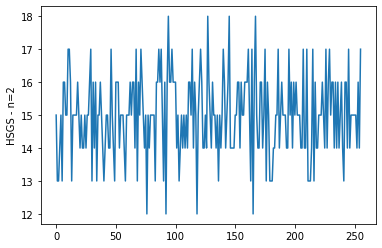

In [12]:
plt.plot(compareN2[0])
plt.ylabel('HSGS - n=2')
plt.show()

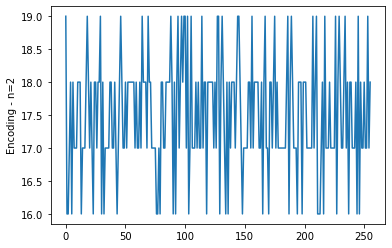

In [13]:
plt.plot(compareN2[1])
plt.ylabel('Encoding - n=2')
plt.show()

### n=4

In [14]:
testSetN4 = make8AllBinRandom(256)
testSetN4

[([-1, -1, -1, 1, 1, -1, 1, 1], [-1, 1, 1, -1, -1, -1, 1, -1]),
 ([-1, 1, 1, 1, 1, -1, 1, -1], [1, -1, -1, 1, 1, 1, 1, 1]),
 ([-1, -1, 1, 1, -1, 1, 1, -1], [1, 1, -1, -1, -1, 1, 1, -1]),
 ([1, 1, -1, 1, -1, 1, -1, 1], [-1, -1, -1, 1, 1, -1, 1, -1]),
 ([-1, -1, -1, 1, -1, -1, -1, -1], [1, 1, -1, 1, -1, -1, -1, -1]),
 ([1, 1, -1, -1, 1, 1, 1, 1], [-1, -1, 1, -1, 1, -1, 1, -1]),
 ([1, -1, -1, 1, -1, 1, 1, -1], [1, -1, 1, -1, 1, 1, 1, -1]),
 ([1, -1, -1, -1, 1, -1, 1, -1], [1, -1, -1, 1, 1, -1, 1, 1]),
 ([-1, -1, 1, -1, -1, -1, 1, -1], [1, 1, -1, -1, -1, -1, 1, 1]),
 ([1, 1, -1, 1, 1, 1, -1, -1], [1, -1, 1, 1, 1, 1, 1, 1]),
 ([-1, 1, 1, -1, 1, 1, 1, 1], [1, -1, 1, -1, 1, -1, 1, 1]),
 ([-1, 1, -1, -1, 1, 1, 1, 1], [1, 1, -1, -1, 1, 1, -1, 1]),
 ([-1, -1, -1, 1, -1, -1, -1, 1], [1, 1, -1, -1, -1, 1, -1, 1]),
 ([1, 1, -1, 1, -1, -1, -1, -1], [1, 1, -1, 1, 1, -1, -1, -1]),
 ([-1, 1, 1, -1, -1, 1, 1, -1], [1, 1, -1, 1, -1, -1, -1, -1]),
 ([-1, -1, 1, -1, -1, 1, -1, 1], [-1, -1, -1, -1, 1, -1, -

In [15]:
len(testSetN4)

256

In [16]:
compareN4 = compareCircuitSize(testSetN4)
compareN4

Using local qasm_simulator testSet size: 256
0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255

[[34,
  37,
  28,
  41,
  38,
  35,
  33,
  40,
  27,
  38,
  34,
  38,
  28,
  35,
  34,
  40,
  32,
  33,
  39,
  29,
  27,
  34,
  32,
  36,
  37,
  38,
  35,
  41,
  39,
  30,
  36,
  41,
  36,
  35,
  40,
  29,
  26,
  35,
  35,
  31,
  35,
  39,
  34,
  36,
  29,
  30,
  38,
  34,
  34,
  41,
  41,
  34,
  38,
  32,
  37,
  28,
  32,
  36,
  32,
  28,
  34,
  34,
  28,
  33,
  42,
  29,
  36,
  31,
  37,
  34,
  34,
  40,
  36,
  37,
  25,
  34,
  36,
  38,
  39,
  27,
  39,
  40,
  38,
  37,
  40,
  27,
  32,
  35,
  39,
  31,
  34,
  29,
  27,
  36,
  36,
  32,
  33,
  32,
  34,
  32,
  40,
  39,
  28,
  36,
  29,
  34,
  34,
  37,
  38,
  35,
  25,
  33,
  38,
  37,
  30,
  28,
  32,
  34,
  32,
  32,
  33,
  33,
  34,
  38,
  34,
  36,
  34,
  32,
  34,
  40,
  28,
  27,
  33,
  32,
  31,
  36,
  30,
  34,
  42,
  31,
  30,
  27,
  40,
  32,
  33,
  35,
  39,
  37,
  37,
  26,
  37,
  33,
  33,
  38,
  37,
  33,
  33,
  37,
  33,
  33,
  39,
  28,
  36,
  32,
  29,
  39,
  28

In [17]:
len(compareN4[0])

256

In [18]:
len(compareN2[0])

256

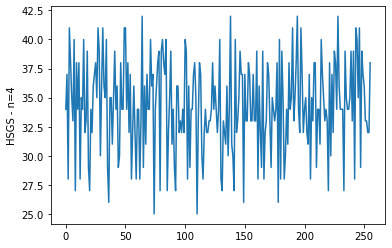

In [19]:
plt.plot(compareN4[0])
plt.ylabel('HSGS - n=4')
plt.show()

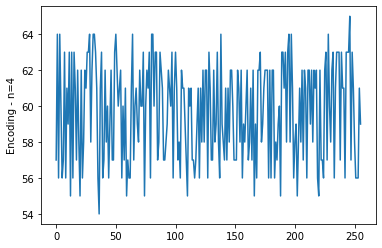

In [20]:
plt.plot(compareN4[1])
plt.ylabel('Encoding - n=4')
plt.show()

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  # Remove the CWD from sys.path while we load stuff.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages

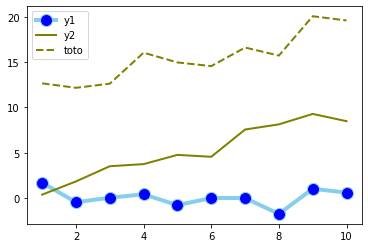

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


In [22]:
df

,x,y1,y2,y3
0,1,1.690526,0.374571,12.650700
1,2,-0.465937,1.828452,12.154336
2,3,0.032820,3.505299,12.612860
3,4,0.407516,3.738644,16.029072
4,5,-0.788923,4.757251,14.954614
5,6,0.002066,4.546759,14.549321
6,7,-0.000890,7.554580,16.594772
7,8,-1.754724,8.123881,15.711685
8,9,1.017658,9.274460,20.049397
9,10,0.600499,8.473475,19.583526


In [23]:
df4=pd.DataFrame({'x': range(1,257), 'HSGS n=4': np.array(compareN4[0]), 'Encoding n=4': np.array(compareN4[1]) })

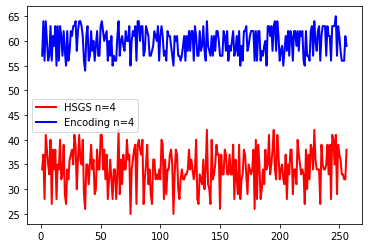

In [24]:
# multiple line plot
# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'HSGS n=4', data=df4, marker='', color='red', linewidth=2)
plt.plot( 'x', 'Encoding n=4', data=df4, marker='', color='blue', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

In [25]:
df2=pd.DataFrame({'x': range(1,257), 'HSGS - n=2': np.array(compareN2[0]), 'Encoding - n=2': np.array(compareN2[1]) })

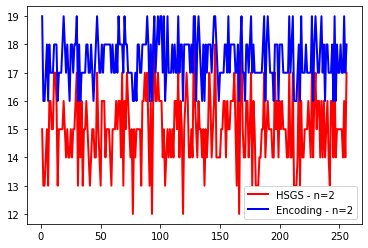

In [26]:
# multiple line plot
# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'HSGS - n=2', data=df2, marker='', color='red', linewidth=2)
plt.plot( 'x', 'Encoding - n=2', data=df2, marker='', color='blue', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

In [29]:
df3=pd.DataFrame({'x': range(1,257), 'BWQN n=4': np.array(compareN2[0]), 'RWQN n=4': np.array(compareN2[1]), 'BWQN n=8': np.array(compareN4[0]), 'RWQN n=8': np.array(compareN4[1]) })

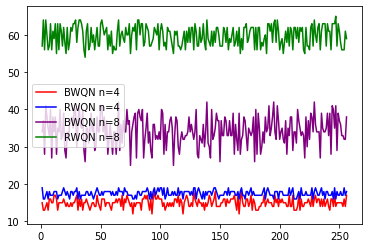

In [30]:
# multiple line plot
# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'BWQN n=4', data=df3, marker='', color='red', linewidth=1.5)
plt.plot( 'x', 'RWQN n=4', data=df3, marker='', color='blue', linewidth=1.5)
plt.plot( 'x', 'BWQN n=8', data=df3, marker='', color='purple', linewidth=1.5)
plt.plot( 'x', 'RWQN n=8', data=df3, marker='', color='green', linewidth=1.5)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

In [ ]:
len(compareN4[0])

In [ ]:
tstSetN16 = make16AllBinRandom(256)

In [ ]:
compareN16 = compareCircuitSize(tstSetN16)

In [ ]:
plt.plot( 'x', 'HSGS - n=2', data=df2, marker='', color='red', linewidth=2)
plt.plot( 'x', 'Encoding - n=2', data=df2, marker='', color='blue', linewidth=2)
plt.plot( 'x', 'HSGS n=4', data=df4, marker='', color='yellow', linewidth=2)
plt.plot( 'x', 'Encoding n=4', data=df4, marker='', color='green', linewidth=2)
plt.plot( 'x', 'HSGS n=6', data=df4, marker='', color='yellow', linewidth=2)
plt.plot( 'x', 'Encoding n=4', data=df4, marker='', color='green', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()